In [ ]:
import json

In [2]:
# Reading the json file as a dictionary
import json


with open("/Users/mohamedaminechafik/Desktop/Finamaze project/data_market.json") as jsonFile:
    jsonObject = json.load(jsonFile)
    jsonFile.close()

In [90]:
list(jsonObject.keys())


['NDX', 'GOOG', 'AMZN', 'TSLA', 'AAPL', 'UBER', 'NFLX']

In [63]:
data = pd.DataFrame(data = jsonObject["NDX"])
data["Date"] = pd.to_datetime(data["Date"])
data = data.set_index("Date")
#index = list(jsonObject["NDX"]["Date"])
dat = data.sort_values(by=["Date"])




# STEP I : DATA PROCESSING

In [135]:
def get_stock_price( jsonObject= jsonObject,
                    stocks : list = None, 
                    start : str= None, 
                    end : str = None ):

    """ This function aims to perform stock prices extraction from a json file
    #   Parameters:

    jsonObject (jsonObject):The jsonObject which is data in json format.

    stocks (list):The list that contains names of stocks.

    start (str):The string which is the start of the extraction period.

    end (str):The string which is the end of the extraction period.

    #   Returns:

    A tuple of dataframes. The number of dataframes is the number of stocks. """
                    
    if stocks == None :
        stocks = list(jsonObject.keys())
        
    dic = dict()
    
    for stock in stocks:
        data_stock = pd.DataFrame(data = jsonObject[stock])
        data_stock["Date"] = pd.to_datetime(data_stock ["Date"])
        data_stock  = data_stock.set_index("Date")
        data_stock = data_stock.sort_values(by=["Date"])["Close"]
        data_stock = data_stock.loc[start:end]
        dic[stock] = data_stock

    return ( dic[stock] for stock in list(dic.keys()) )
    
    

The chosen format is a pandas dataframe as the library is ....

# STEP II : DATA WRANGLING AND VISUALIZATION

In [140]:
Google , aaple, tesla = get_stock_price(stocks =["GOOG","AAPL","TSLA"], start = "2017-01-01", end = "2021-12-31")

<AxesSubplot:xlabel='Date'>

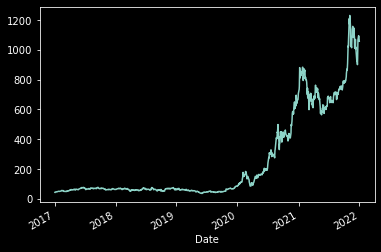

In [147]:
tesla.plot()